(374, 380)


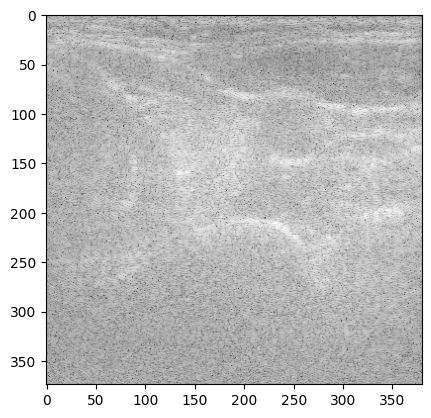

In [47]:
import numpy as np
import matplotlib.pyplot as plt

IQdata = np.load('/home/mhb0917/의료영상처리/202255646/artery_IQData_bmode.npy')
shape = IQdata.shape
print(shape)
IQdata = abs(IQdata)
img_log = np.log1p(IQdata) 
plt.imshow(img_log, cmap='gray')


(180, 95, 300)


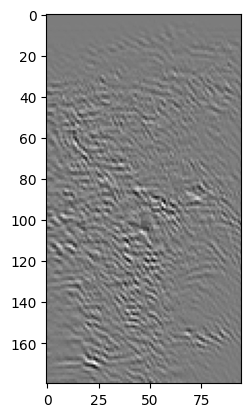

In [42]:
import numpy as np
import matplotlib.pyplot as plt

iq_data = np.load('/home/mhb0917/의료영상처리/202255646/artery_IQData_doppler_reshape.npy')
shape = iq_data.shape
print(shape)

plt.imshow(iq_data[:,:,100], cmap='gray')

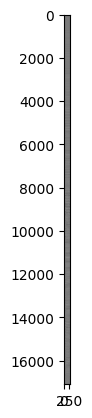

In [43]:
# Cell 3: SVD를 위해 2D로 변환
depth, lateral, ensemble = iq_data.shape
iq_2d = iq_data.reshape(depth * lateral, ensemble)  # shape: (17100, 300)
plt.imshow(iq_2d, cmap='gray')

(17100, 300) (300,) (300, 300)


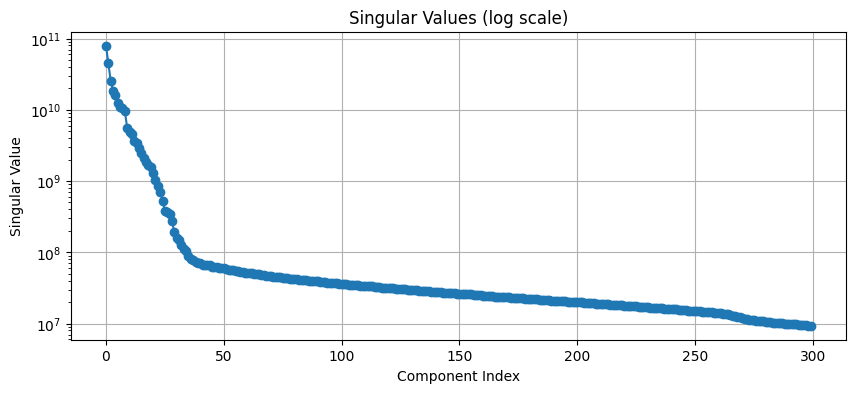

In [44]:
from numpy.linalg import svd  # numpy 내부 모듈

U, S, Vh = svd(iq_2d, full_matrices=False)
print(U.shape, S.shape, Vh.shape)  # U: (17100, 300), S: (300,), Vh: (300, 300)
#print(S)  # singular values

# 특이값 시각화
plt.figure(figsize=(10,4))
plt.plot(S, marker='o')
plt.yscale('log')  # 로그 스케일
plt.title("Singular Values (log scale)")
plt.xlabel("Component Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

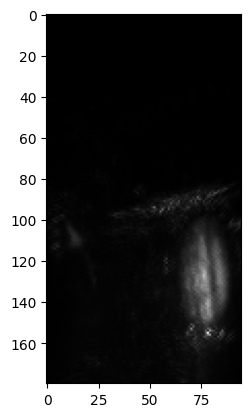

In [50]:
# 중간 성분만 유지
k1, k2 = 30, 270
S_filtered = np.zeros_like(S)
S_filtered[k1:k2] = S[k1:k2]
Sigma = np.diag(S_filtered)

# 필터링된 영상 복원
A_filtered = U @ Sigma @ Vh

# 복원된 A_filtered을 다시 reshape 해서 영상화
power_doppler_filtered = np.mean(np.abs(A_filtered)**2, axis=1)  # 예시: time 방향 평균
plt.imshow(power_doppler_filtered.reshape(180, 95), cmap='gray')